# Question 1

## 1.1 Data Cleaning:
- Load the dataset into a Pandas DataFrame.
- Handle any missing values by either removing the rows or filling them with
appropriate values.
- Convert the date column to datetime data type if it is not already.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
# Reading the data in notebook
elec_store_data = pd.read_csv('electronics_store_sales.csv')
# Inspecting the data
elec_store_data.head()

,Date,Product,Units Sold,Price
0,01/01/2023,Tablet F,13.0,499.0
1,01/01/2023,Smartphone A,3.0,299.0
2,02/01/2023,Laptop B,10.0,799.0
3,03/01/2023,Laptop B,10.0,799.0
4,03/01/2023,Smartphone A,3.0,299.0


In [20]:
elec_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        180 non-null    object 
 1   Product     180 non-null    object 
 2   Units Sold  179 non-null    float64
 3   Price       179 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.8+ KB


In [21]:
elec_store_data.describe()

,Units Sold,Price
count,179.000000,179.000000
mean,9.670391,379.335196
std,5.423396,229.307456
min,1.000000,59.000000
25%,5.000000,199.000000
50%,9.000000,299.000000
75%,14.000000,499.000000
max,19.000000,799.000000


In [22]:
elec_store_data.shape

(180, 4)

In [23]:
# Checking for Missing values in the data
elec_store_data.isnull().sum()

Date          0
Product       0
Units Sold    1
Price         1
dtype: int64

Observation: As we have 1 missing values in Units Sold and Price we can handle this missing value by using the mean

In [24]:
elec_store_data["Units Sold"].fillna(elec_store_data["Units Sold"].mean(), inplace=True)
elec_store_data["Price"].fillna(elec_store_data["Price"].mean(), inplace=True)

In [25]:
# Now Checking the values again after filling missing values
elec_store_data.isnull().sum()

Date          0
Product       0
Units Sold    0
Price         0
dtype: int64

In [26]:
# Checking the type of Date Column
elec_store_data['Date'].dtype

dtype('O')

dtype('O') or Pandas object which is Python type string, and this corresponds to Numpy string_, or unicode_ types.

In [27]:
# Converting it into datetime format
elec_store_data['Date'] = pd.to_datetime(elec_store_data['Date'], format="%d/%m/%Y")
elec_store_data['Date'].dtype

dtype('<M8[ns]')

In [34]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype. 

## 1.2 Data Analysis:
- Calculate the total sales (price * units sold) for each product.
- Find the top 5 best-selling products in terms of units sold.

In [28]:
# Calculating the Total Sales for each product
elec_store_data['Total Sales'] = elec_store_data['Units Sold'] * elec_store_data['Price']
elec_store_data.head()

,Date,Product,Units Sold,Price,Total Sales
0,2023-01-01,Tablet F,13.0,499.0,6487.0
1,2023-01-01,Smartphone A,3.0,299.0,897.0
2,2023-01-02,Laptop B,10.0,799.0,7990.0
3,2023-01-03,Laptop B,10.0,799.0,7990.0
4,2023-01-03,Smartphone A,3.0,299.0,897.0


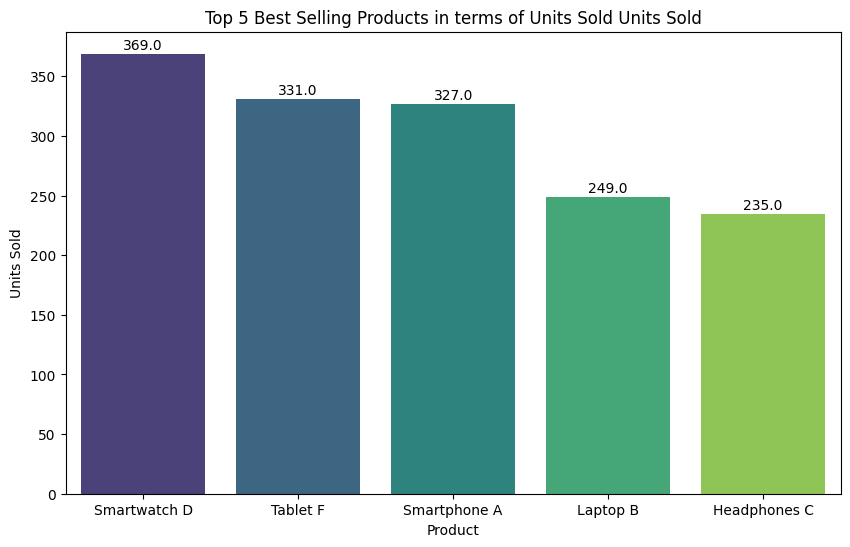

In [29]:
# Finding the Top 5 Best Selling Product in termms of units sold and add labels also
top_5_products = elec_store_data.groupby('Product')['Units Sold'].sum().nlargest(5)
plt.figure(figsize=(10,6))
sns.barplot(x=top_5_products.index, y=top_5_products.values, palette='viridis')
plt.title('Top 5 Best Selling Products in terms of Units Sold Units Sold')
for i, var in enumerate(top_5_products.values):
    plt.text(i, var + 1, str(var), ha='center', va='bottom')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.show()

Analysis: Smartwatch D is the clear winner in sales, moving 369 units. Tablet F follows closely with 331 units, and Smartphone A isn’t far behind at 327 units. This shows that more affordable gadgets are driving most of the sales. Interestingly, Laptop B, which was the top seller in terms of revenue last time, ranks fourth with just 249 units sold. That means its revenue is mainly thanks to its high price tag, not because it’s flying off the shelves. Finally, Headphones C finishes off the top five with 235 units sold. All in all, it looks like smaller, cheaper electronics are leading in sales, while the pricier Laptop B sells less but still brings in a lot of money.

## 1.3 Data Visualisation

- Create a time series plot showing the total sales for each month. (10 Marks)
- Generate a bar plot displaying the top 5 best-selling products. (10 Marks)
- Create a box plot to show the distribution of sales across different products.

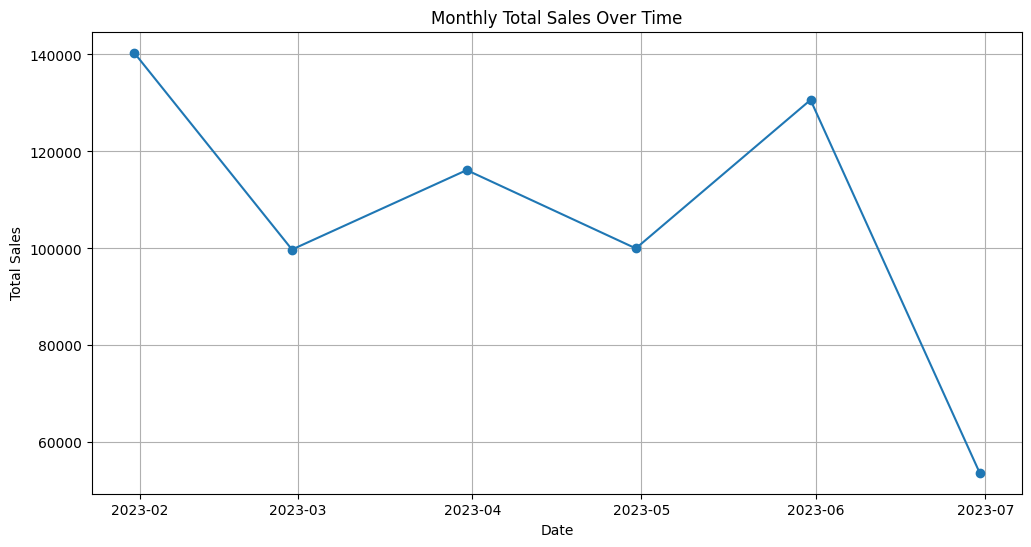

In [30]:
# Time Series Plot of Total Sales over time
elec_store_data.set_index('Date', inplace=True)
monthly_sales = elec_store_data['Total Sales'].resample('M').sum()
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

The sales reached their highest point in February 2023 (approximately, $140,000) and then decreased drastically in March. It was followed by a recovery in the subsequent months, which peaked in April, and then the subsequent low in May signaling a very robust recovery in June, which almost equaled the first high. The period, however, ended with a dramatic and alarming crash in July 2023 where the sales were dropped to the bottom (slightly higher than $50,000). This tendency shows a vulnerable sales climate where no apparent, long-term, upward trend is seen, and the end result is a serious operation challenge during the last month reported.

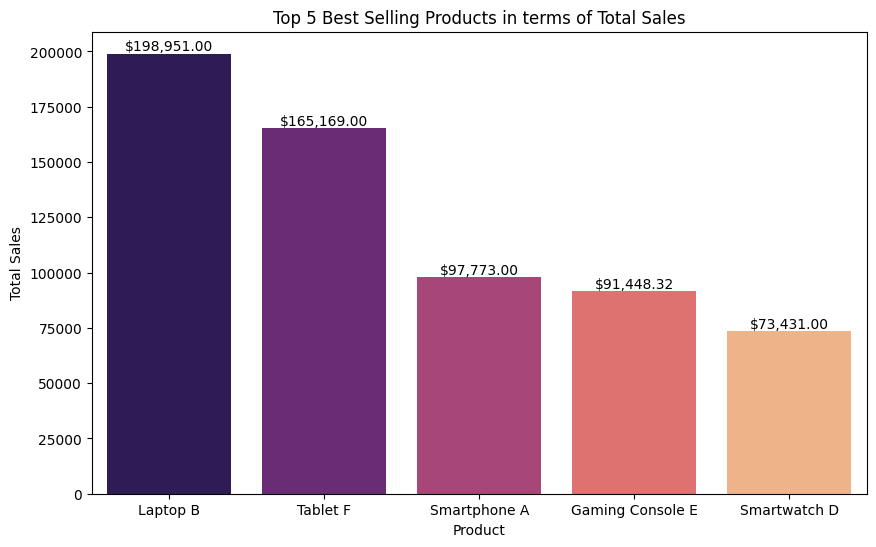

In [31]:
# Generate a bar showing the Top5 best selling product in terms of total sales
top_5_sales_products = elec_store_data.groupby('Product')['Total Sales'].sum().nlargest(5)
plt.figure(figsize=(10,6))
sns.barplot(x=top_5_sales_products.index, y=top_5_sales_products.values, palette='magma')
plt.title('Top 5 Best Selling Products in terms of Total Sales')
for i, var in enumerate(top_5_sales_products.values):
    plt.text(i, var + 1, f"${var:,.2f}", ha='center', va='bottom')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

The best seller that has not been disputed is the Laptop B, which has earned 198,951.00 which is far much more than any other product. Tablet F comes in at a close as the second with a total sales of $165,169.00. The sales difference between these two leading and the rest of the products is quite significant; e.g. Smartphone A, which occupies position three with $97,773.00, yields significantly lower sales contribution than Laptop B. Gaming Console E ($91,448.32) and Smartwatch D ($73,431.00) which occupy positions three and four respectively. 
The general conclusion is that sales revenue of the electronic store will be highly dependent on the premium and pricier products, Laptop B and Tablet F, and the remaining three products will be of a considerable support to the total sales figure, but on a significantly lower scale.

In [32]:
# Displaying the Top 5 Best Selling Products in terms of Units Sold and Total Sales
print(f"Top 5 Best Selling Products in terms of Units Sold:\n{top_5_products}\n")
print(f"Top 5 Best Selling Products in terms of Total Sales:\n{top_5_sales_products}\n")

Top 5 Best Selling Products in terms of Units Sold:
Product
Smartwatch D    369.0
Tablet F        331.0
Smartphone A    327.0
Laptop B        249.0
Headphones C    235.0
Name: Units Sold, dtype: float64

Top 5 Best Selling Products in terms of Total Sales:
Product
Laptop B            198951.000000
Tablet F            165169.000000
Smartphone A         97773.000000
Gaming Console E     91448.319684
Smartwatch D         73431.000000
Name: Total Sales, dtype: float64



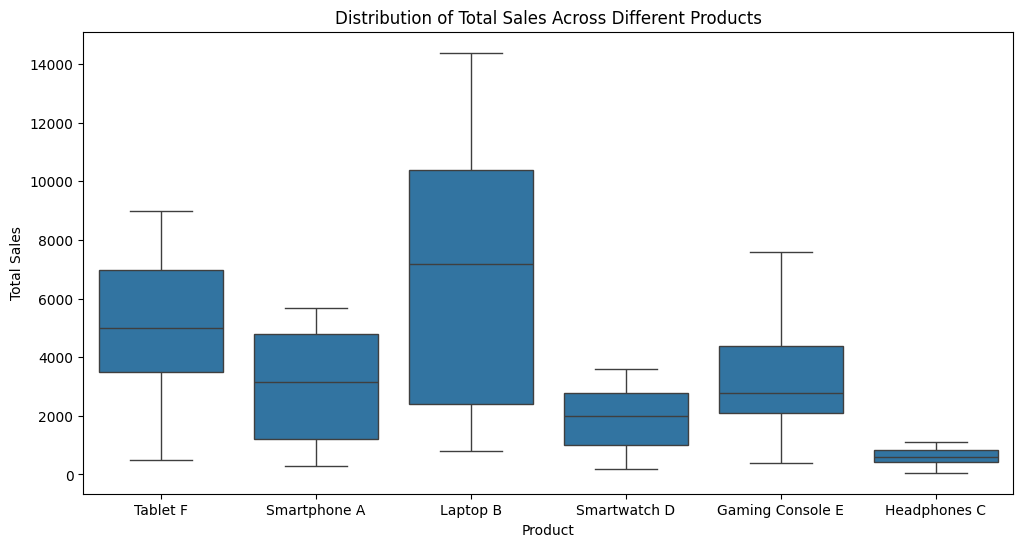

In [33]:
# box plot to show the distribution of sales across different products.
plt.figure(figsize=(12,6))
sns.boxplot(x='Product', y='Total Sales', data=elec_store_data)
plt.title('Distribution of Total Sales Across Different Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()


Laptop B obviously is the best in performance, as it has the most median sales (the line within the box) and has the widest range implying the highest volume of typical sales and the high degree of sales variability. Tablet F has the highest sales after Laptop B, and the range of interquartile is much larger (the box itself), which means that it has a significant variability at the middle 50 percentage-based of its sales. Gaming Console E and Smartphone A show the same median sales yet Gaming console has a more extensive spread indicating that it has more volatile sales. Compared to this, Smartwatch D and Headphones C in particular have the worst sales performance, with Headphones C showing a very small box and range, which means that the sales are always low and not variable. Essentially, although they are not on their own primary contributors to the high-value sales, such products as the Headphones C are stable but have a small contribution to sales.

# Question 2: Principal Component Analysis (PCA) and Variance Interpretation

## 2.1 Data Preparation
- Load the given dataset (CSV) - Customer Analytics for a Subscription Service.
- Check for missing values and briefly describe how you handled them.
- Standardize all numerical variables — explain why scaling is needed before PCA


In [55]:
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px

In [35]:
# Load dataset
df = pd.read_csv("customer_data.csv")

# Display first few rows
df.head()

,age,monthly_spend,sessions_per_month,avg_session_duration,num_products_used,support_tickets,satisfaction_score,days_since_last_login,referrals_made,email_open_rate,discounts_used,contract_length_months
0,56,204.886248,18,32.801581,3,2,5.619126,33,0,72.729410,1,24
1,69,161.298610,16,29.008753,7,3,6.261264,69,2,31.749845,3,12
2,46,59.225201,18,26.516653,7,1,6.422807,44,0,58.159138,2,24
3,32,100.630637,16,33.008369,7,0,7.432948,57,3,57.100512,0,12
4,60,170.676446,15,5.000000,8,2,5.663175,50,1,75.499548,2,6


In [51]:
# Inspecting last five rows
print(f"Last 5 Rows of data\n",df.tail())

Last 5 Rows of data
      age  monthly_spend  sessions_per_month  avg_session_duration  \
495   65      89.784683                  21             29.675304   
496   42      95.539288                   8             40.811525   
497   57      63.733556                  19             12.486067   
498   62      83.070670                  20             37.937701   
499   18      65.932616                  16             25.834847   

     num_products_used  support_tickets  satisfaction_score  \
495                  4                1            3.814475   
496                  4                4            7.434481   
497                  9                0            7.068807   
498                  1                1            8.168545   
499                  2                1            5.334361   

     days_since_last_login  referrals_made  email_open_rate  discounts_used  \
495                     61               1        62.552224               5   
496                     63 

In [52]:
df.describe()

,age,monthly_spend,sessions_per_month,avg_session_duration,num_products_used,support_tickets,satisfaction_score,days_since_last_login,referrals_made,email_open_rate,discounts_used,contract_length_months
count,500.000000,500.000000,500.00000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,44.220000,118.907811,15.08200,24.914001,4.96200,1.994000,6.941786,45.750000,0.994000,48.199558,2.902000,16.260000
std,15.036082,39.508069,4.17878,7.825283,2.64472,1.377592,1.473524,26.189603,0.911936,20.691391,1.582848,8.992783
min,18.000000,20.000000,4.00000,5.000000,1.00000,0.000000,2.643303,0.000000,0.000000,0.000000,0.000000,6.000000
25%,32.000000,91.430184,12.00000,19.858624,3.00000,1.000000,5.969698,24.000000,0.000000,35.121630,2.000000,12.000000
50%,45.000000,119.099466,15.00000,24.867356,5.00000,2.000000,6.852037,47.500000,1.000000,48.729154,3.000000,12.000000
75%,57.000000,145.146654,18.00000,30.120783,7.00000,3.000000,7.932442,68.000000,2.000000,61.960956,4.000000,24.000000
max,69.000000,243.155232,29.00000,50.101988,9.00000,6.000000,10.000000,89.000000,4.000000,100.000000,9.000000,36.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     500 non-null    int64  
 1   monthly_spend           500 non-null    float64
 2   sessions_per_month      500 non-null    int64  
 3   avg_session_duration    500 non-null    float64
 4   num_products_used       500 non-null    int64  
 5   support_tickets         500 non-null    int64  
 6   satisfaction_score      500 non-null    float64
 7   days_since_last_login   500 non-null    int64  
 8   referrals_made          500 non-null    int64  
 9   email_open_rate         500 non-null    float64
 10  discounts_used          500 non-null    int64  
 11  contract_length_months  500 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


In [54]:
df.shape

(500, 12)

In [37]:
# Check missing values
df.isnull().sum()

age                       0
monthly_spend             0
sessions_per_month        0
avg_session_duration      0
num_products_used         0
support_tickets           0
satisfaction_score        0
days_since_last_login     0
referrals_made            0
email_open_rate           0
discounts_used            0
contract_length_months    0
dtype: int64

The dataset doesn't contain any null or missing values. Standardization can be done on all numerical values

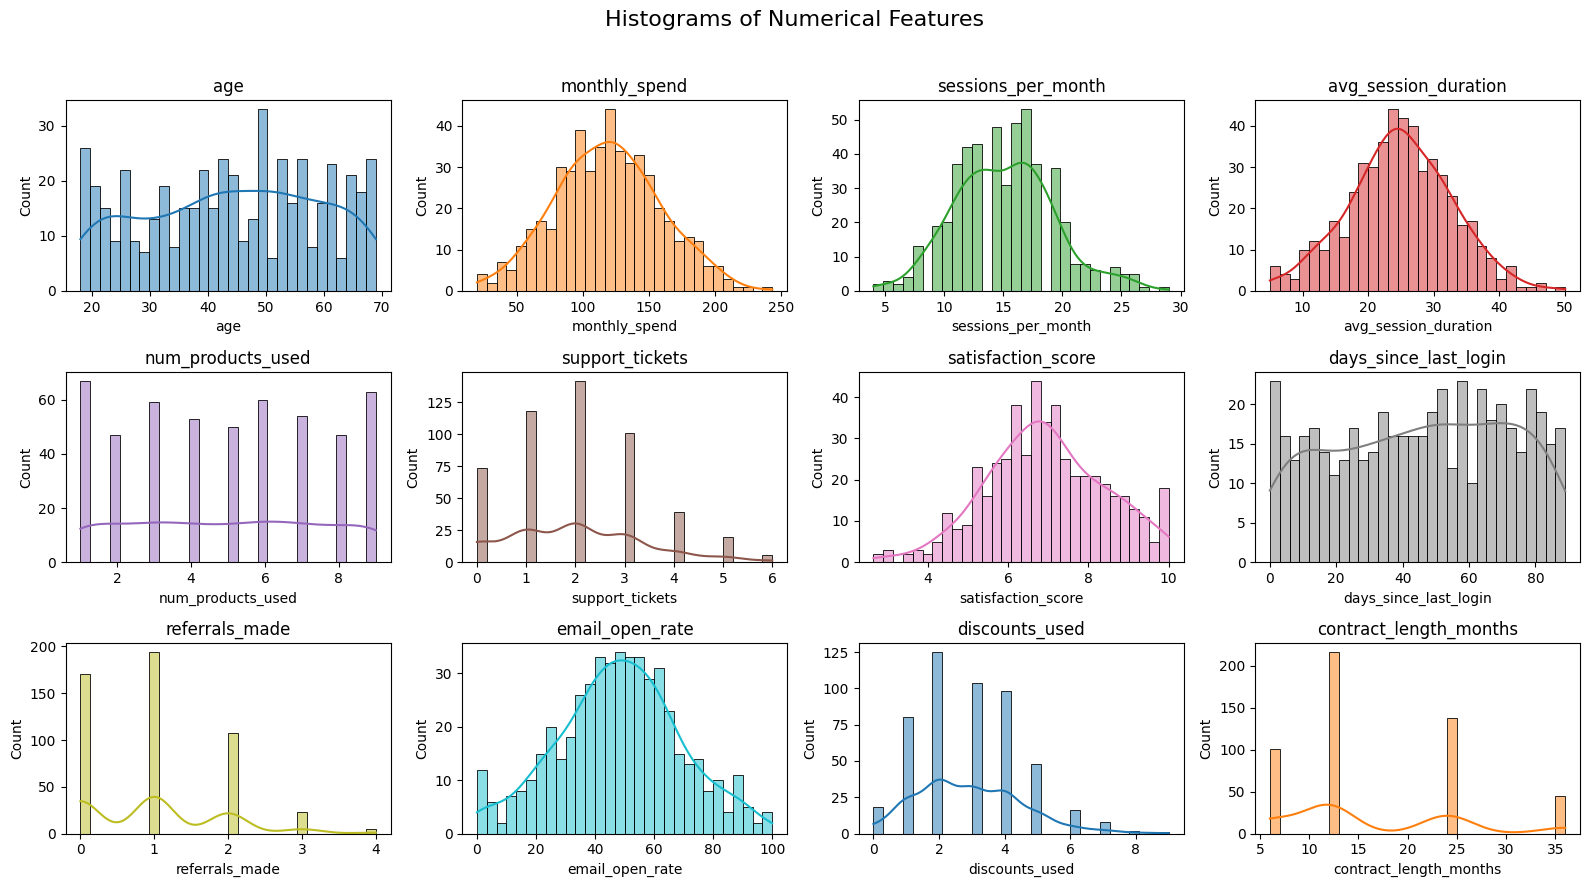

In [56]:
data_numerical_features = df.select_dtypes(include=[np.number]).columns
# Plot histograms for each numerical feature
num_features = data_numerical_features
n = len(num_features)
cols = 4
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()

for idx, feat in enumerate(num_features):
    ax = axes[idx]
    sns.histplot(df[feat], kde=True, bins=30, ax=ax, color=f"C{idx % 10}")
    ax.set_title(feat)
    ax.grid(False)

# Turn off any unused subplots
for j in range(n, len(axes)):
    axes[j].axis("on")

plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

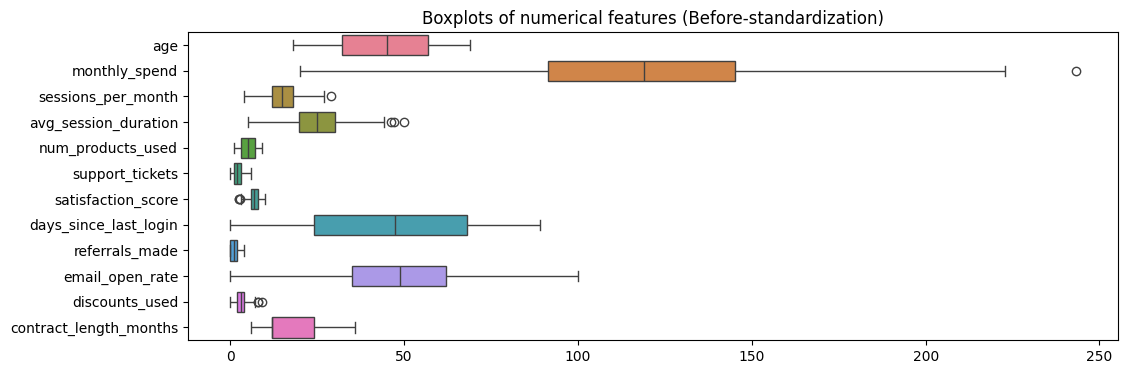

In [58]:
# Boxplots to spot outliers and finding the scale differences
plt.figure(figsize=(12,4))
sns.boxplot(data=df[data_numerical_features], orient='h')
plt.title("Boxplots of numerical features (Before-standardization)")
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns (all columns are numeric here)
X = df.values

# Standardize
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[ 0.78423339,  2.17840422,  0.69898931, ...,  1.18669736,
        -1.20283516,  0.86155219],
       [ 1.6496862 ,  1.07404018,  0.21990137, ..., -0.795799  ,
         0.06197573, -0.47418764],
       [ 0.11850046, -1.51215646,  0.69898931, ...,  0.48182139,
        -0.57042971,  0.86155219],
       ...,
       [ 0.85080668, -1.39792993,  0.93853328, ...,  1.60839182,
         1.95919208, -0.47418764],
       [ 1.18367315, -0.90799254,  1.17807725, ..., -0.7846356 ,
        -1.20283516, -0.47418764],
       [-1.74555174, -1.34221316,  0.21990137, ..., -2.29499618,
        -1.20283516, -1.14205756]], shape=(500, 12))

Explanation:

## 2.2 Apply PCA
- Run PCA on the standardized data.
- Extract:
- - eigenvalues (or use explained_variance_)
- - explained variance ratio (explained_variance_ratio_)
- Produce a scree plot (component number vs. eigenvalue or % variance explained).
- Produce a cumulative explained variance plot and identify how many components are
needed to capture at least 80–90% of the variance


In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [40]:
from sklearn.decomposition import PCA

# Run PCA
pca = PCA()
pca.fit(X_std)

# Transform data
X_pca = pca.transform(X_std)

In [41]:
eigenvalues = pca.explained_variance_
variance_ratio = pca.explained_variance_ratio_

print("Eigenvalues:\n", eigenvalues)
print("\nExplained Variance Ratio:\n", variance_ratio)

Eigenvalues:
 [1.27634127 1.16931278 1.13493312 1.08844153 1.04902046 1.02380746
 0.97300804 0.93240346 0.88148901 0.87574608 0.82747354 0.79207136]

Explained Variance Ratio:
 [0.10614905 0.09724785 0.0943886  0.09052205 0.08724353 0.08514665
 0.08092184 0.07754489 0.0733105  0.07283288 0.06881822 0.06587393]


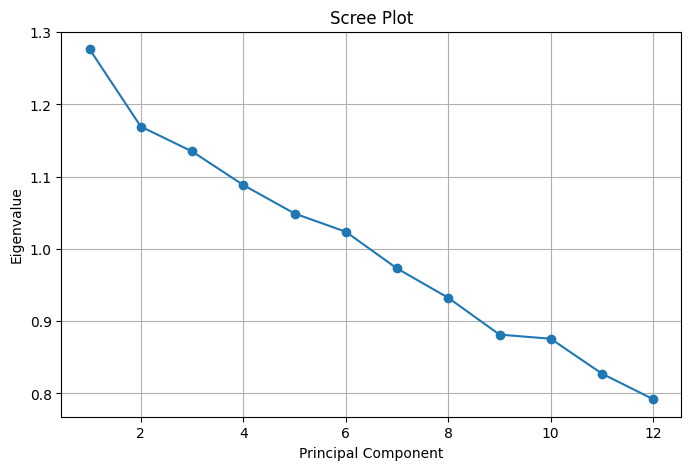

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()

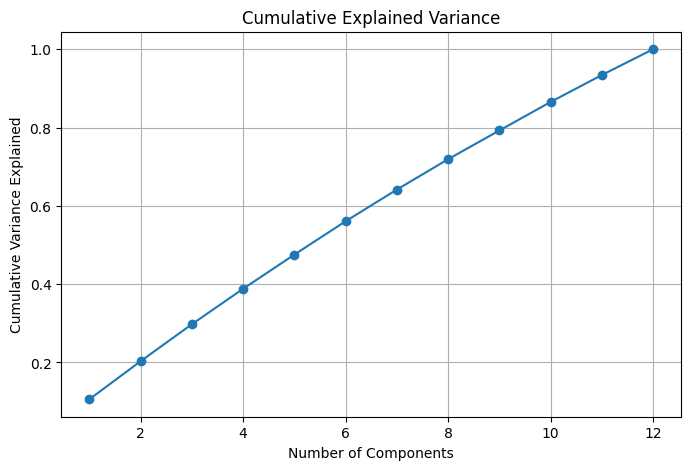

In [43]:
import numpy as np

cum_var = np.cumsum(variance_ratio)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()

In [44]:
for i, cv in enumerate(cum_var):
    if cv >= 0.80:
        print("Components needed for 80% variance:", i+1)
        break

for i, cv in enumerate(cum_var):
    if cv >= 0.90:
        print("Components needed for 90% variance:", i+1)
        break

Components needed for 80% variance: 10
Components needed for 90% variance: 11


## 2.3 Interpreting Components


- Print the PCA loadings (component weights for each original variable).
- For the first 2–3 principal components, identify:
- - which variables have the largest (absolute) loadings
- - what those components seem to represent (e.g. “overall engagement”, “spend-heavy
users”, “support-heavy/low satisfaction customers”).
- State which original variables appear most important in explaining the variability in the
dataset

In [45]:
# Get PCA loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(df.columns))],
    index=df.columns
)

print(loadings)

                             PC1       PC2       PC3       PC4       PC5  \
age                    -0.337350 -0.013740  0.516011 -0.079677  0.322766   
monthly_spend           0.177254 -0.451148  0.230968 -0.448258 -0.095604   
sessions_per_month      0.284868  0.155898  0.468576  0.410086  0.135275   
avg_session_duration   -0.235445 -0.065851 -0.176957  0.573853  0.022525   
num_products_used       0.474346  0.205807  0.132264 -0.150775  0.456590   
support_tickets         0.336975 -0.225801 -0.239857  0.218456  0.020017   
satisfaction_score      0.013034 -0.386487  0.000820  0.021208  0.321943   
days_since_last_login   0.351830  0.322998 -0.027649  0.233143  0.057123   
referrals_made          0.141869  0.243127 -0.416252 -0.339786  0.352961   
email_open_rate        -0.106853  0.452557 -0.139346 -0.209583 -0.292922   
discounts_used         -0.466473  0.266882  0.005337 -0.042574  0.440070   
contract_length_months -0.080866 -0.292317 -0.401257  0.093723  0.384763   

           

In [46]:
# Find absolute largest contributors for each of PC1, PC2, PC3
for i in range(3):
    comp = loadings.iloc[:, i]
    print(f"\nTop contributors to PC{i+1}:")
    print(comp.abs().sort_values(ascending=False).head())


Top contributors to PC1:
num_products_used        0.474346
discounts_used           0.466473
days_since_last_login    0.351830
age                      0.337350
support_tickets          0.336975
Name: PC1, dtype: float64

Top contributors to PC2:
email_open_rate           0.452557
monthly_spend             0.451148
satisfaction_score        0.386487
days_since_last_login     0.322998
contract_length_months    0.292317
Name: PC2, dtype: float64

Top contributors to PC3:
age                       0.516011
sessions_per_month        0.468576
referrals_made            0.416252
contract_length_months    0.401257
support_tickets           0.239857
Name: PC3, dtype: float64


In [47]:
# Overall importance score = sum of squared loadings across components
importance = (loadings**2).sum(axis=1).sort_values(ascending=False)
importance
print("Overall variable importance based on PCA loadings:\n", importance)

Overall variable importance based on PCA loadings:
 referrals_made            1.0
monthly_spend             1.0
num_products_used         1.0
email_open_rate           1.0
contract_length_months    1.0
support_tickets           1.0
age                       1.0
sessions_per_month        1.0
discounts_used            1.0
days_since_last_login     1.0
avg_session_duration      1.0
satisfaction_score        1.0
dtype: float64


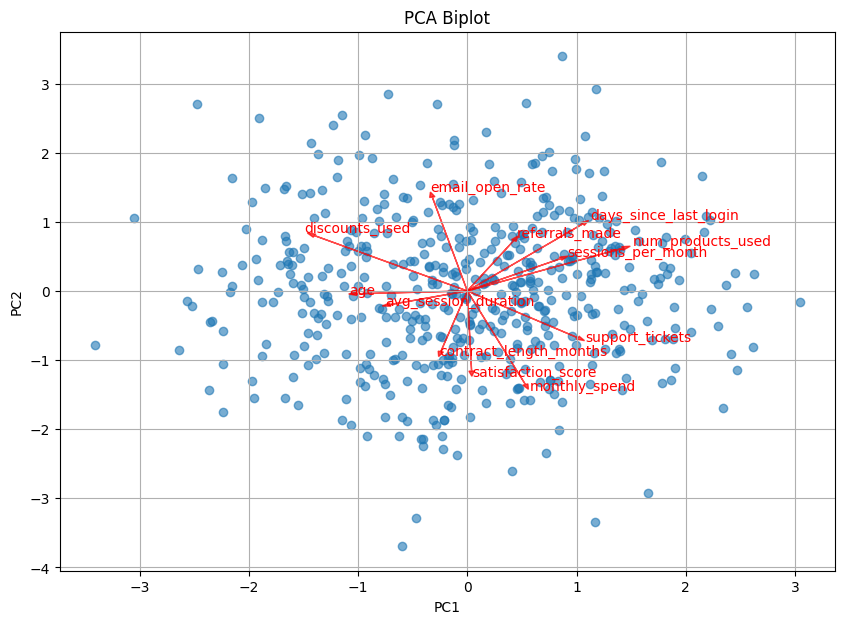

In [48]:
# PCA reduce to 2 components for biplot
pca2 = PCA(n_components=2)
pca_scores = pca2.fit_transform(X_std)

loadings = pca2.components_.T

plt.figure(figsize=(10,7))

# Scatter plot of PC1 and PC2
plt.scatter(pca_scores[:,0], pca_scores[:,1], alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot")

# Add feature vectors
for i, var in enumerate(df.columns):
    plt.arrow(0, 0, loadings[i,0]*3, loadings[i,1]*3, 
              color='r', alpha=0.7, head_width=0.05)
    plt.text(loadings[i,0]*3.2, loadings[i,1]*3.2, var, color='r')

plt.grid(True)
plt.show()

## 2.4 Inference and Reporting

Write a short (≈300 words) interpretation that answers:
- How many principal components would you keep, and why?
- What proportion of the variability in customer behaviour is captured by those components?
- Which 3–4 original variables would you say are “most influential” in this dataset, based on
loadings?
- How could a business use this PCA — e.g. customer segmentation, reducing dashboard
dimensions, feature selection for modelling?